
# **Axis Stock Price Prediction and Forecasting Using LSTM**



## An AI-Powered Approach to Predict Axis Bank's Closing Prices and Future Trends

## Importing Necessary Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import yfinance as yf
import datetime as dt

In [ ]:
!nvidia-smi

Mon Dec 16 08:51:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Setting Visualization Style

In [ ]:
# Set seaborn style for better plots
sns.set(style="whitegrid")


## Fetching and Preprocessing Stock Data

In [ ]:
# Fetch stock data
symbol = "AXISBANK.NS"
start_date = "2018-01-01"
end_date = "2024-11-11"

data = yf.download(symbol, start=start_date, end=end_date)
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close
Ticker,AXISBANK.NS
Date,
2018-01-01,565.500000
2018-01-02,559.500000
2018-01-03,560.450012
2018-01-04,559.900024
2018-01-05,563.250000
...,...
2024-11-04,1139.250000
2024-11-05,1171.699951


In [ ]:
# Fill missing dates and forward-fill missing values
data = data.asfreq('D')  # Daily frequency
data.fillna(method='ffill', inplace=True)

<ipython-input-7-7140bd320ec8>:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
# Feature engineering: Add moving averages
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()
data.dropna(inplace=True)  # Drop rows with NaN after rolling

## Data Scaling

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

## Sequence Creation for LSTM

In [ ]:
# Create sequences for LSTM
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback, :])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Use past 60 days to predict the next day
X, y = create_sequences(scaled_data, lookback)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Building and training the LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(lookback, X.shape[2])))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0316 - val_loss: 0.0081
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 7.4600e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 8.6852e-04
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014

## Evaluating the Model

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((len(y_pred), scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_data.shape[1]-1))), axis=1))[:, 0]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Performance metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 284.10151821464535
Mean Absolute Percentage Error (MAPE): 0.010934198128917834
R² Score: 0.9675256748732154


## Visualizing Actual vs Predicted Prices

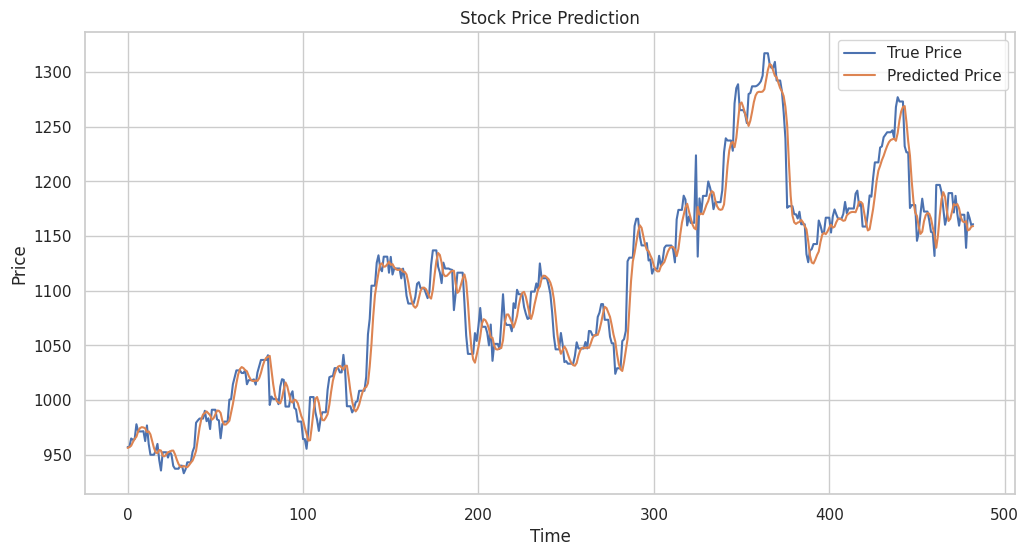

In [ ]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='True Price')
plt.plot(y_pred_rescaled, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Forecasting Future Prices

In [ ]:
# Forecast next 3 days
last_sequence = scaled_data[-lookback:]  # Last `lookback` days of data
last_sequence = np.expand_dims(last_sequence, axis=0)  # Reshape for LSTM input

# Predict the next 3 days
future_predictions = []
for _ in range(3):
    next_pred = model.predict(last_sequence)[0, 0]
    future_predictions.append(next_pred)
    # Update the sequence with the predicted value
    next_step = np.concatenate((last_sequence[0, 1:], [[next_pred] + [0] * (scaled_data.shape[1] - 1)]), axis=0)
    last_sequence = np.expand_dims(next_step, axis=0)

# Rescale predictions back to original scale
future_predictions_rescaled = scaler.inverse_transform(
    np.concatenate((np.array(future_predictions).reshape(-1, 1), np.zeros((3, scaled_data.shape[1]-1))), axis=1)
)[:, 0]

# Print forecasted prices
print("Next 3 days forecasted prices:", future_predictions_rescaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Next 3 days forecasted prices: [1158.81020858 1174.9897951  1203.39203854]


 ## Interactive Visualization Using Plotly

In [ ]:
import plotly.graph_objects as go

# Create a plot for actual and predicted prices
fig = go.Figure()

# Plot actual closing prices
fig.add_trace(go.Scatter(
    x=data.index[-len(y_test_rescaled):],  # Last portion of dates for test set
    y=y_test_rescaled,
    mode='lines',
    name='True Price',
    line=dict(color='blue')
))

# Plot predicted closing prices
fig.add_trace(go.Scatter(
    x=data.index[-len(y_pred_rescaled):],  # Same date range for predictions
    y=y_pred_rescaled,
    mode='lines',
    name='Predicted Price',
    line=dict(color='red')
))

# Plot next 3 days forecasted prices
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=3, freq='D')
fig.add_trace(go.Scatter(
    x=forecast_dates,
    y=future_predictions_rescaled,
    mode='lines+markers',
    name='Next 3 Days Forecast',
    line=dict(color='green', dash='dash'),
    marker=dict(size=8)
))

# Update layout with titles and labels
fig.update_layout(
    title='Axis Bank Closing Price Prediction',
    xaxis_title='Date',
    yaxis_title='Closing Price (INR)',
    template='plotly_dark',
    showlegend=True
)

# Show plot
fig.show()

# Save the plot as a .html file
fig.write_html('axis_bank_forecast_plot.html')


## Saving Model and Predictions

In [ ]:
# Save results for later use
import pickle

# Save the model and predictions for later use (only need to run once)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('predictions.pkl', 'wb') as f:
    pickle.dump((y_test_rescaled, y_pred_rescaled, future_predictions_rescaled), f)

print("Model and predictions saved successfully.")


Model and predictions saved successfully.
